In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Function to implement cross validation
def implement_cross_validation_KNN(k,X,y,mean_error,std_error):
    from sklearn.neighbors import KNeighborsRegressor
    model = KNeighborsRegressor(n_neighbors=k,weights='uniform')
    temp=[]
     # implementing k-fold cross validation
    from sklearn.model_selection import KFold
    kf = KFold(n_splits=10)
    for train, test in kf.split(X):
        model.fit(X[train], y[train])
        ypred = model.predict(X[test])
        from sklearn.metrics import mean_squared_error
        temp.append(mean_squared_error(y[test],ypred))
    #Calculating mean, variance and standard deviation for RMSE    
    mean_error.append(np.array(temp).mean())
    std_error.append(np.array(temp).std())
    return model,mean_error,std_error

In [3]:
#Function to implement kNN
def implement_KNN(k,X,y):
    from sklearn.neighbors import KNeighborsRegressor
    model = KNeighborsRegressor(n_neighbors=k,weights='uniform')
    model.fit(X,y)
    return model

In [4]:
#Function to plot errorbar 
def plot_errorbar(ax,k,mean_error,std_error):
    ax.errorbar(k,mean_error,yerr=std_error,linewidth=3)
    ax.set_xlabel("kNeighbors", fontsize=18) 
    ax.set_ylabel("Mean Square Error", fontsize=18)
    ax.set_title("Errorbar Plot for KNN Regressor varying KNeigbours")
    return ax

In [5]:
#Function to plot plot training and predicted data
def plot_data_models(X,y,ax,data):
    if data=="Actual":
        ax.scatter(X,y, marker='x',c='black',s=100,label="Actual Data")
    else:
        ax.scatter(X,y,marker='*',c='red',s=50,label="Predicted Data")
    ax.set_xlabel("X(Air Temparature)", fontsize=18) 
    ax.set_ylabel("Y(Relative Humidity)", fontsize=18)
    ax.set_title("Prediction and Actual Data",fontsize=18)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    return ax

In [6]:
#Function to manage legends     
def manage_legends(fig):
    handles, labels = fig.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles)) 
    fig.legend(by_label.values(),by_label.keys(),bbox_to_anchor=(0.85, 0.85),loc=1,prop={'size':14})

In [7]:
#Main Function

#Defining penalty values and plot variables
k = [1,2,3,5,10,15]
mean_error=[]; std_error=[]

In [8]:
# Read the data from Train data file
df = pd.read_csv("ProcessedWeatherData_most_frequent.csv")
print(df)

      station_id  AtmosphericPressure  WindDirection  WindSpeed  Gust  \
0             M3               1011.4          270.0       18.0  25.0   
1             M6               1023.3          190.0       11.0  14.0   
2             M4               1033.2          200.0       19.0  23.0   
3             M6               1012.5          300.0       13.0  20.0   
4             M6               1011.0          190.0       13.0  18.0   
...          ...                  ...            ...        ...   ...   
87978         M5               1017.6          220.0       19.0  25.0   
87979         M5               1030.6          100.0        7.0  12.0   
87980         M6               1011.2          250.0       19.0  31.0   
87981         M6                995.0          150.0       15.0  20.0   
87982         M5               1000.2          240.0       26.0  35.0   

       WaveHeight  WavePeriod  AirTemperature  DewPoint  SeaTemperature  \
0             2.0         5.0            16.2   

In [9]:
# Selecting relevant colums after feature selection
df.drop(columns=["station_id"],inplace = True)
print(df)

       AtmosphericPressure  WindDirection  WindSpeed  Gust  WaveHeight  \
0                   1011.4          270.0       18.0  25.0         2.0   
1                   1023.3          190.0       11.0  14.0         0.9   
2                   1033.2          200.0       19.0  23.0         1.7   
3                   1012.5          300.0       13.0  20.0         2.7   
4                   1011.0          190.0       13.0  18.0         2.0   
...                    ...            ...        ...   ...         ...   
87978               1017.6          220.0       19.0  25.0         2.2   
87979               1030.6          100.0        7.0  12.0         0.8   
87980               1011.2          250.0       19.0  31.0         6.0   
87981                995.0          150.0       15.0  20.0         5.0   
87982               1000.2          240.0       26.0  35.0         4.0   

       WavePeriod  AirTemperature  DewPoint  SeaTemperature  RelativeHumidity  
0             5.0            16

In [10]:
# Normalising train data
from sklearn.preprocessing import MinMaxScaler
Scaler = MinMaxScaler()
df_stand = Scaler.fit_transform(df.values)

In [11]:
X_train = df_stand[:,:-1]
y_train = df_stand[:,-1]
print(y_train)

[0.77419355 0.72580645 0.62903226 ... 0.87096774 0.62903226 0.61290323]


In [12]:
import time
start_time = time.time()

In [13]:
# Iterations for each value of Neighbors
for j in range(len(k)):
    model,mean_error,std_error=implement_cross_validation_KNN(k[j],X_train,y_train,mean_error,std_error)

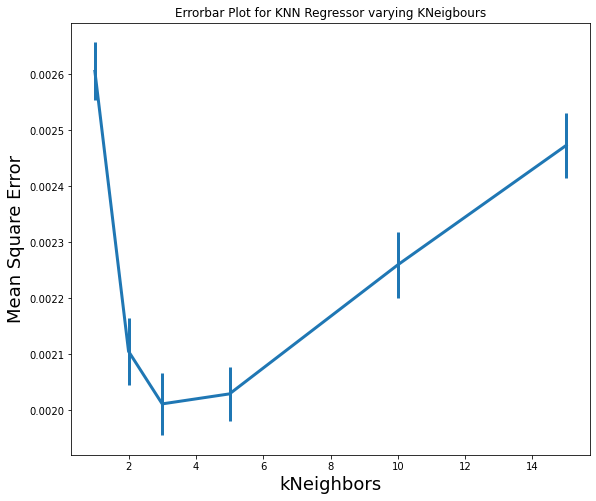

In [14]:
# Plotting cross validation plot
fig=plt.figure(1, figsize=(12, 8))
ax=fig.add_axes([0.1, 0.1, 0.6, 0.75])
ax=plot_errorbar(ax,k,mean_error,std_error) 

In [15]:
end_time = time.time() - start_time
print(end_time)

74.78285098075867


In [16]:
# Read the test data from test data file
df_test = pd.read_csv("ProcessedWeatherDataTest_most_frequent.csv")
print(df_test)

      station_id  AtmosphericPressure  WindDirection  WindSpeed  Gust  \
0             M6               1019.6          250.0       15.0  20.0   
1             M6               1001.3          320.0       25.0  35.0   
2             M6               1019.2          150.0       15.0  20.0   
3             M2               1024.0           10.0       16.0  21.0   
4             M4               1005.6          290.0       19.0  25.0   
...          ...                  ...            ...        ...   ...   
21991         M6               1018.3          200.0        3.0   8.0   
21992         M6               1010.0          140.0       21.0  31.0   
21993         M4                992.2          220.0       15.0  20.0   
21994         M5               1021.4          130.0        9.0  14.0   
21995         M6               1015.7           20.0       15.0  25.0   

       WaveHeight  WavePeriod  AirTemperature  DewPoint  SeaTemperature  \
0             3.4         7.0             9.8   

In [17]:
# Selecting relevant columns
df_test.drop(columns=["station_id"],inplace = True)
df_test.isnull().values.any()

False

In [18]:
y_test = df_test['RelativeHumidity'].values

In [19]:
# Normalising test data 
df_test_stand = Scaler.transform(df_test.values)
print(df_test_stand)

[[0.803663   0.69444444 0.31914894 ... 0.53815261 0.31192661 0.64516129]
 [0.66959707 0.88888889 0.53191489 ... 0.53815261 0.28440367 0.64516129]
 [0.8007326  0.41666667 0.31914894 ... 0.68674699 0.63302752 0.69354839]
 ...
 [0.6029304  0.61111111 0.31914894 ... 0.26104418 0.24770642 0.48387097]
 [0.81684982 0.36111111 0.19148936 ... 0.75100402 0.5412844  0.82258065]
 [0.77509158 0.05555556 0.31914894 ... 0.40963855 0.27522936 0.56451613]]


In [20]:
X_test_scaled = df_test_stand[:,:-1]
print(X_test_scaled)

[[0.803663   0.69444444 0.31914894 ... 0.49431818 0.53815261 0.31192661]
 [0.66959707 0.88888889 0.53191489 ... 0.49431818 0.53815261 0.28440367]
 [0.8007326  0.41666667 0.31914894 ... 0.68181818 0.68674699 0.63302752]
 ...
 [0.6029304  0.61111111 0.31914894 ... 0.19886364 0.26104418 0.24770642]
 [0.81684982 0.36111111 0.19148936 ... 0.69318182 0.75100402 0.5412844 ]
 [0.77509158 0.05555556 0.31914894 ... 0.36931818 0.40963855 0.27522936]]


In [21]:
# Training the model with selected value of K-Neigbors
finalModel=implement_KNN(3,X_train,y_train)

In [22]:
# Prdicting relative humidity
y_pred=finalModel.predict(X_test_scaled)

In [23]:
# Denormalising test data
df_pred = pd.DataFrame(np.hstack((X_test_scaled,y_pred[:, None])))
df_pred_inv=Scaler.inverse_transform(df_pred)
y_pred_inv=df_pred_inv[:,-1]

In [24]:
# Calculate Mean Squared error
from sklearn.metrics import mean_squared_error
print("MSE: ",mean_squared_error(y_test,y_pred_inv))

MSE:  7.213811602109474


In [25]:
# # Calculate Maximum error
from sklearn.metrics import max_error
print("Maximum Error: ",max_error(y_test,y_pred_inv))

Maximum Error:  19.66666666666667


In [26]:
# Calculate Mean Absolute error
from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error: ",mean_absolute_error(y_test,y_pred_inv))

Mean Absolute Error:  1.98240589198036


In [27]:
# Calculate oreR2 sc
from sklearn.metrics import r2_score
print("R2-Score: ",r2_score(y_test,y_pred_inv))

R2-Score:  0.93511525957642


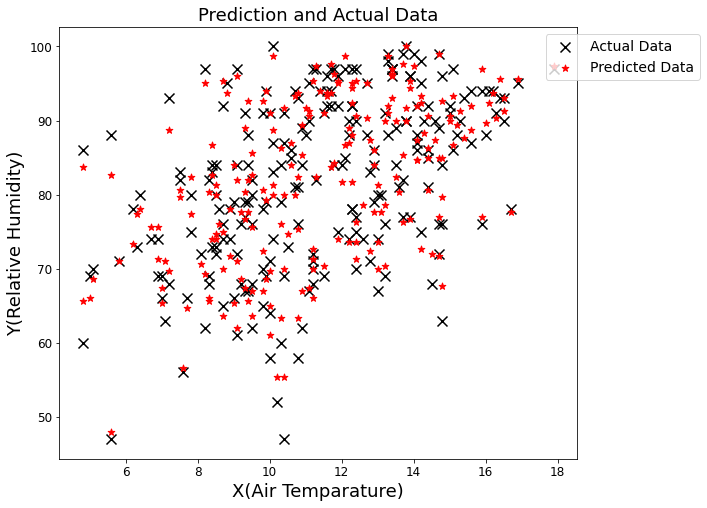

In [28]:
# Plotting Actual and Predicted Data
x_test_single_feature = df_test['AirTemperature'].values
fig=plt.figure(2, figsize=(12, 8))
ax=fig.add_axes([0.1, 0.1, 0.6, 0.75])
ax=plot_data_models(x_test_single_feature[::100],y_test[::100],ax,"Actual")
ax=plot_data_models(x_test_single_feature[::100],y_pred_inv[::100],ax,"Predicted")
manage_legends(fig)
plt.show()

Text(0.5, 1.0, 'Residual plot in KNN Regression')

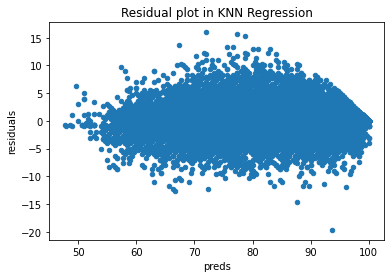

In [29]:
# Plotting Residual Plot
preds = pd.DataFrame({"preds":y_pred_inv, "true":y_test})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter")
plt.title("Residual plot in KNN Regression")